## Lab Exercise 6: Dynamic Time Warping

### (a) Plot both vectors to visualize their patterns.

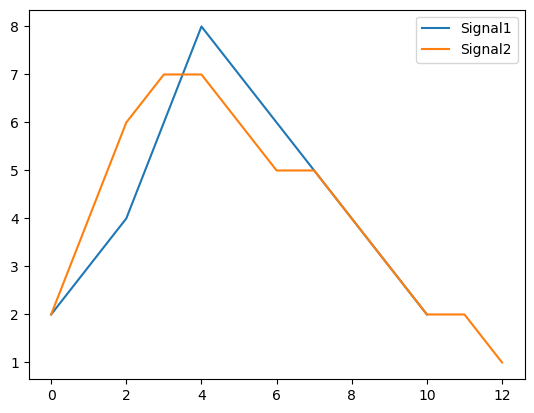

In [1]:
import matplotlib.pyplot as plt
signal1=[2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2]
signal2=[2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1]
plt.plot(signal1)
plt.plot(signal2)
plt.legend(['Signal1','Signal2'])
plt.show()

### (b) Implement Dynamic Time Warping (DTW) algorithm

In [4]:
import numpy as np
n, m = len(signal1), len(signal2)
cost_matrix = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        cost_matrix[i, j] = abs(signal1[i] - signal2[j])

accumulated_cost = np.zeros((n, m))
accumulated_cost[0, 0] = cost_matrix[0, 0]

for i in range(1, n):
    accumulated_cost[i, 0] = accumulated_cost[i - 1, 0] + cost_matrix[i, 0]

for j in range(1, m):
    accumulated_cost[0, j] = accumulated_cost[0, j - 1] + cost_matrix[0, j]

for i in range(1, n):
    for j in range(1, m):
        accumulated_cost[i, j] = cost_matrix[i, j] + min(
            accumulated_cost[i - 1, j], 
            accumulated_cost[i, j - 1], 
            accumulated_cost[i - 1, j - 1],  
        )

### (c) Compute the accumulated cost matrix.

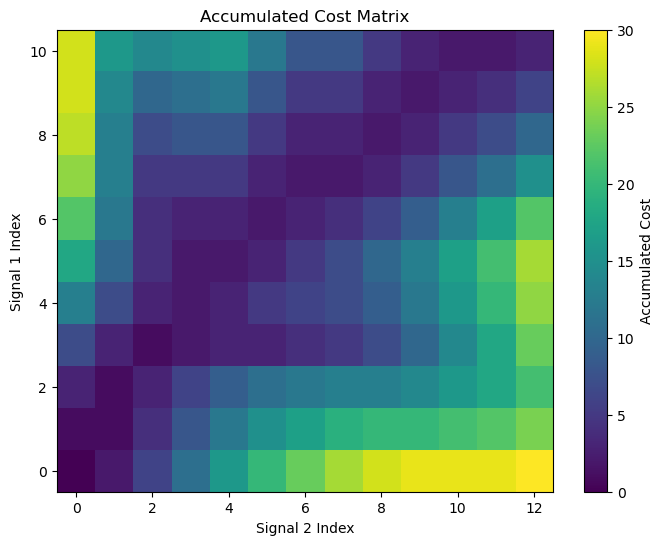

In [5]:
plt.figure(figsize=(8, 6))
plt.imshow(accumulated_cost, origin="lower", cmap="viridis", aspect="auto")
plt.colorbar(label="Accumulated Cost")
plt.title("Accumulated Cost Matrix")
plt.xlabel("Signal 2 Index")
plt.ylabel("Signal 1 Index")
plt.show()

### (d) Find and visualize the warping path.

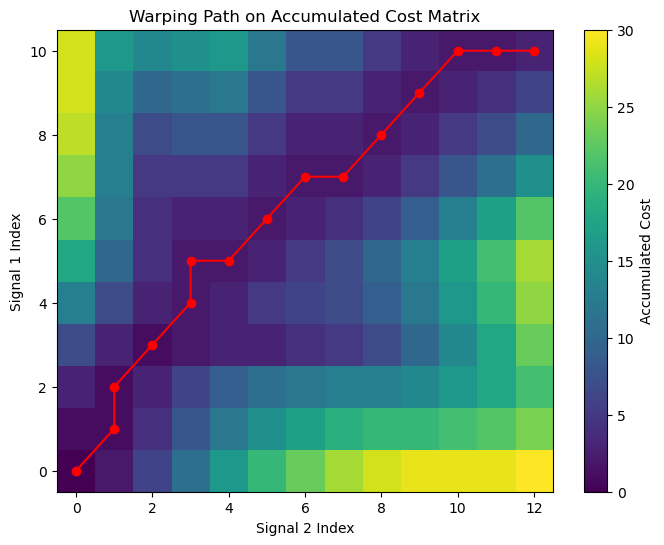

In [7]:
i, j = n - 1, m - 1
path = [(i, j)]
while i > 0 or j > 0:
    if i == 0:
        j -= 1
    elif j == 0:
        i -= 1
    else:
        choices = [
            accumulated_cost[i - 1, j],
            accumulated_cost[i, j - 1],
            accumulated_cost[i - 1, j - 1],
        ]
        step = np.argmin(choices)
        if step == 0:
            i -= 1
        elif step == 1:
            j -= 1
        else:
            i -= 1
            j -= 1
    path.append((i, j))
path = path[::-1]

plt.figure(figsize=(8, 6))
plt.imshow(accumulated_cost, origin="lower", cmap="viridis", aspect="auto")
plt.colorbar(label="Accumulated Cost")
plt.title("Warping Path on Accumulated Cost Matrix")
plt.xlabel("Signal 2 Index")
plt.ylabel("Signal 1 Index")
path_x, path_y = zip(*path)
plt.plot(path_y, path_x, marker="o", color="red")
plt.show()

### (e) Calculate the DTW distance between the vectors.

In [8]:
dtw_distance = accumulated_cost[n - 1, m - 1]
print(f"DTW Distance: {dtw_distance}")

DTW Distance: 3.0


### Write an inference on how does the warping path align the two vectors and What does the DTW distance indicate about their similarity?


1. Warping Path Alignment:
The warping path identifies an optimal mapping between the time indices of Signal 1 and Signal 2, accounting for variations in length and temporal differences.
By allowing non-linear alignments (e.g., stretching or compressing segments of one signal relative to the other), the warping path ensures that similar features in both signals align closely, even if they occur at slightly different times.
The path demonstrates how one signal "flows" into the other, capturing their structural similarity despite differences in timing or amplitude scaling.
2. Dynamic Time Warping (DTW) Distance:
The DTW distance quantifies the cumulative cost of aligning the two signals along the warping path.
A lower DTW distance indicates higher similarity between the two signals. It reflects that fewer distortions (e.g., stretching, compressions) were required to align the signals.
Conversely, a higher DTW distance signifies greater dissimilarity, implying significant differences in shape, length, or patterns between the two signals.


## END